#PLOTS

In [ ]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.inspection import permutation_importance
import joblib
import re

In [ ]:
txcohendf = pd.read_csv('xcohen.csv') #cohesive energy data of all MXenes wrt X-atom layer
tcohendf = pd.read_csv('tcohen.csv') #cohesive energy data of all MXenes wrt termination
print(xcohendf.head())
print(tcohendf.head())

#normalized cohesive energy vs mxenes X-atom plot


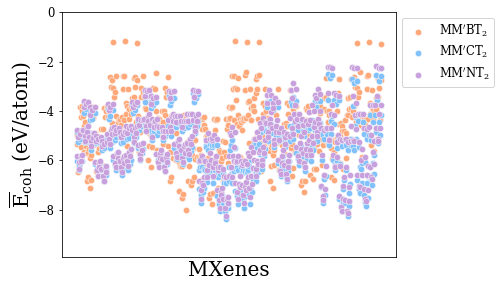

In [ ]:
fig, ax = plt.subplots(figsize=(6,4.5))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11.5
lims = [-9.9,0]

plt.ylim(lims)
plt.ylabel(r'$\mathregular{\overline{E}_{coh}}$ (eV/atom)', fontsize=20)
plt.xlabel("MXenes", fontsize=20)
ax.scatter(xcohendf['Mxenes'], xcohendf['B'], color = '#ffa87a', edgecolor='#fafafa', s=40, linewidth='0.5')
ax.scatter(xcohendf['Mxenes'], xcohendf['C'], color = '#81c1fc', edgecolor='#fafafa', s=40, linewidth='0.5')
ax.scatter(xcohendf['Mxenes'], xcohendf['N'], color = '#c8a0de', edgecolor='#fafafa', s=40, linewidth='0.5')
ax.legend(["MM${^{\prime}}$BT${\mathregular{_2}}$", "MM${^{\prime}}$CT${\mathregular{_2}}$", "MM${^{\prime}}$NT${\mathregular{_2}}$"], loc="upper left", bbox_to_anchor=(1,1))

ax.axes.xaxis.set_ticks([])
fig.savefig('x_cohen 4.5 transparent.png', dpi=700, bbox_inches="tight", transparent=True)


# normalised cohesive energy vs mxenes termination plot


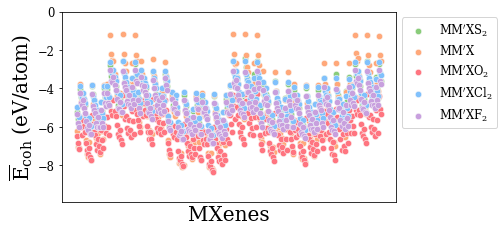

In [ ]:
fig, ax = plt.subplots(figsize=(6,3.5))
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11.5
plt.ylabel(r'$\mathregular{\overline{E}_{coh}}$ (eV/atom)', fontsize=20)
plt.xlabel('MXenes', fontsize=20)
lims = [-9.9,0]

plt.ylim(lims)

colorpattelte=['#a0ce96','#ffc09f', '#a2d2ff', '#ff9aa2', '#cdb4db' ] 
ax.scatter(tcohendf['Mxenes'], tcohendf['S'], color = '#89cc7a', edgecolor='#fafafa', s=40, linewidth='0.5') #green
ax.scatter(tcohendf['Mxenes'], tcohendf['X'], color = '#ffa87a', edgecolor='#fafafa', s=40, linewidth='0.5') #orange
ax.scatter(tcohendf['Mxenes'], tcohendf['O'], color = '#ff7580', edgecolor='#fafafa', s=40, linewidth='0.5') #red
ax.scatter(tcohendf['Mxenes'], tcohendf['Cl'], color = '#81c1fc', edgecolor='#fafafa', s=40, linewidth='0.5') #blue
ax.scatter(tcohendf['Mxenes'], tcohendf['F'], color = '#c8a0de', edgecolor='#fafafa', s=40, linewidth='0.5') #liliac


ax.legend(["MM${^{\prime}}$XS${\mathregular{_2}}$", "MM${^{\prime}}$X", "MM${^{\prime}}$XO${\mathregular{_2}}$", "MM${^{\prime}}$XCl${\mathregular{_2}}$", "MM${^{\prime}}$XF${\mathregular{_2}}$"], loc="upper left", bbox_to_anchor=(1,1))
ax.axes.xaxis.set_ticks([])
fig.savefig("termination cohen3.5.png", dpi=700, bbox_inches="tight", transparent=True)

#heatmap showing PCC


In [ ]:
selected_features = ['atomic no. of metal 1', 'valance electron.2', 'electron affinity (eV).2', 'MP (in degree C).2',  'BP (in degree C).2', 'layer thickness', 'm1-t', 'm1-x', 'dbandcenter', 't-t', 'm-m', 'x-x', 'm-m2', 'wfn', 'max bl', 'normalized ve', 'dbandcenterpr', 'dbandcenter var', 'ea var', 'dbandcenter std', 'x-x var', 'x-x sq', 'm-m2 sq', 't-t2 sq', 'gfe']

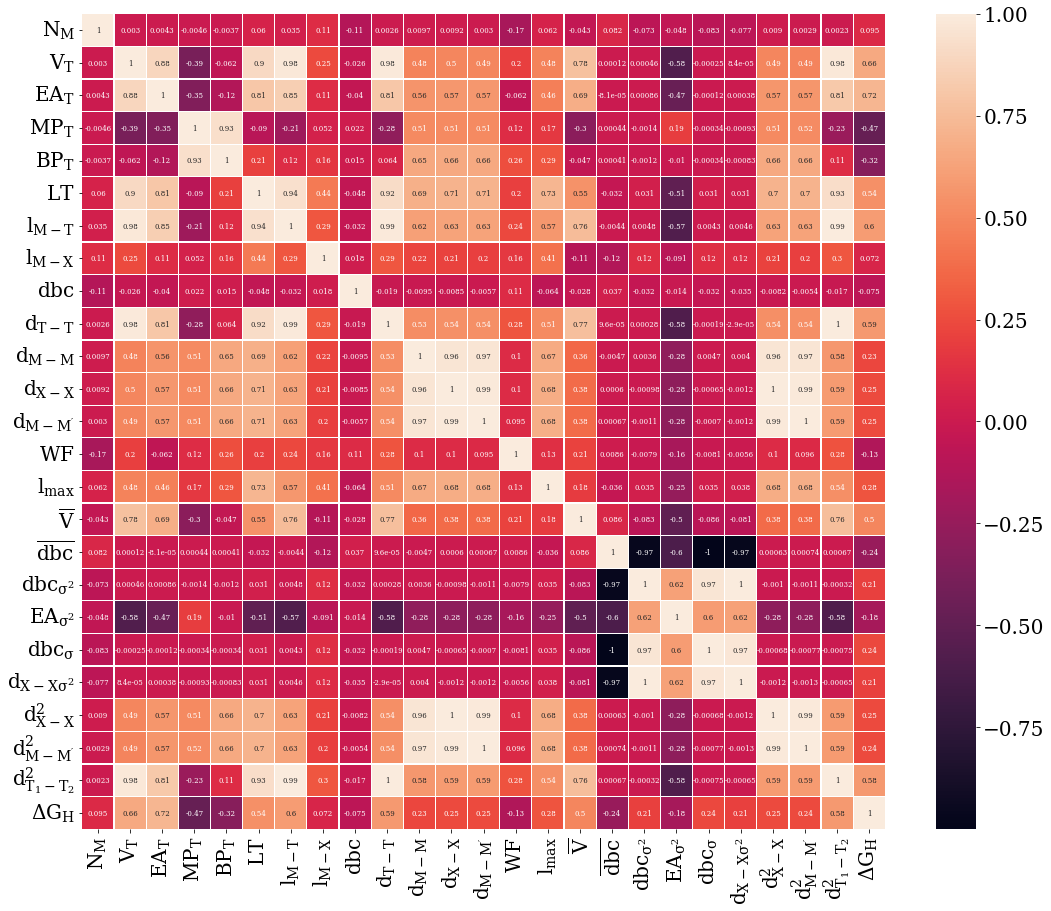

In [ ]:

fig, ax = plt.subplots(figsize=(18, 15))
df = pd.read_csv("fe2.csv")
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 20
df2= df[selected_features7]

featuresname=['N$\mathregular{_{M}}$', 'V$\mathregular{_{T}}$', 'EA$\mathregular{_{T}}$', 'MP$\mathregular{_{T}}$', 'BP$\mathregular{_{T}}$', '$\mathregular{LT}$', 'l$\mathregular{_{M-T}}$', 'l$\mathregular{_{M-X}}$', '$\mathregular{dbc}$', 'd$\mathregular{_{T-T}}$', 'd$\mathregular{_{M-M}}$', 'd$\mathregular{_{X-X}}$', 'd$\mathregular{_{M-M{^\prime}}}$', '$\mathregular{WF}$', 'l$\mathregular{_{max}}$', '$\mathregular{\overline {V}}$', '$\mathregular{\overline {dbc}}$', 'dbc$\mathregular{_{\sigma^2}}$', '$\mathregular{EA_{\sigma^2}}$', 'dbc$\mathregular{_{\sigma}}$', '$\mathregular{{d_{X-X}}_{\sigma^2}}$', 'd$\mathregular{_{X-X}^2}$', 'd$\mathregular{_{M-M{^\prime}}^2}$', 'd$\mathregular{_{T_1-T_2}^2}$', '$\mathregular{\Delta{G}_{H}}$']

corr=df2.corr()

fig = sns.heatmap(corr, annot=True, linewidths=.2, linecolor='white', xticklabels=featuresname, yticklabels=featuresname, annot_kws={'size':7}, )
plt.savefig('heatmap2 annot.png', dpi=600)

#normalized cohesive energy density termination plot


In [ ]:
dft=pd.read_csv('tcohen.csv') #cohesive energy dataset wrt terminations

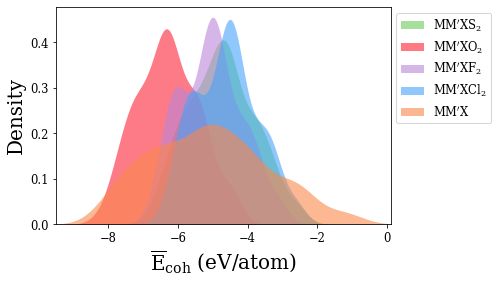

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
fig = sns.kdeplot(
   data=dft, x="gfe", hue="termination",
   fill=True, common_norm=False, palette=['#fa874b', '#47a4fc', '#bb86d9', '#fc2335', '#6ccc58'],
   alpha=0.6, linewidth=0, legend=False, 
)                                      

lims = [-9.5,0.1]

plt.xlim(lims)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11.5
plt.xlabel(r'$\mathregular{\overline{E}_{coh}}$ (eV/atom)', fontsize=20)
plt.ylabel("Density", fontsize=20)

plt.legend(["MM${^{\prime}}$XS${\mathregular{_2}}$", "MM${^{\prime}}$XO${\mathregular{_2}}$", "MM${^{\prime}}$XF${\mathregular{_2}}$", "MM${^{\prime}}$XCl${\mathregular{_2}}$", "MM${^{\prime}}$X" ], loc="upper left", bbox_to_anchor=(1,1))
plt.savefig("kde termination_cohen 4.png", bbox_inches="tight", dpi=600)


#Cross validation plots

In [ ]:
fig = plt.figure( figsize = (6,6))
ax = fig.add_subplot()
ax.fill_between([-4,4], [-4.5,3.5], [-3.5,4.5], color = '#ffdee4')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11
plt.ylabel('ML predicted $\mathregular{\Delta G_H}$ (eV)', fontsize=15)
plt.xlabel('DFT calculated $\mathregular{\Delta G_H}$ (eV)', fontsize=15)
ax.scatter(train_y, predictions, color = '#525b88', edgecolor='#dee2fc', s=40, linewidth='0.5')
plt.text(1, -3, str('$\mathregular{MAE:}$ ') + str(abs(round(score.mean(),3))) + str('$\mathregular{\pm}$') + str(abs(round(score.std(),3))), horizontalalignment='left', size='medium', color='black')
plt.text(1, -3.5, str('$\mathregular{R^2:}$ ') + str(round(score2.mean(),3)) + str('$\mathregular{\pm}$') + str(abs(round(score2.std(),3))), horizontalalignment='left', size='medium', color='black')
name = str(model) + '.png'
lims = [-4,4]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims, '--', color = 'black')

plt.savefig(name, dpi=600)
plt.show()
mae1.append(str(abs(round(score.mean(),3))))
r21.append(str(round(score2.mean(),3)))
mae2.append(str(abs(round(score.std(),3))))
r22.append(str(abs(round(score2.std(),3))))
modelname.append(str(model))

#Test Train RFR GBR Plots


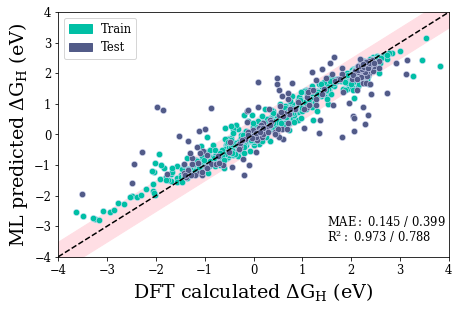

In [ ]:
fig = plt.figure( figsize = (7,4.5))
ax = fig.add_subplot()

ax.fill_between([-4,4], [-4.5,3.5], [-3.5,4.5], color = '#ffdee4')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11.5
plt.ylabel('ML predicted $\mathregular{\Delta G_H}$ (eV)', fontsize=19)
plt.xlabel('DFT calculated $\mathregular{\Delta G_H}$ (eV)', fontsize=19)

ax.scatter(test_y, test_y_pred, color = '#525b88', edgecolor='#dee2fc', s=40, linewidth='0.5')

plt.text(1.5, -3, str('$\mathregular{MAE:}$ ') + str(abs(round(maertrain,3))) + ' / ' + str(abs(round(maertest,3))), horizontalalignment='left', size='medium', color='black')
plt.text(1.5, -3.5, str('$\mathregular{R^2:}$ ') + str(round(r2train,3)) + ' / ' + str(round(r2test,3)), horizontalalignment='left', size='medium', color='black')
name = str(model) + '.png'
lims = [-4,4]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims, '--', color = 'black')
train_patch = mpatches.Patch(color='#00bfa5', label='Train')
test_patch = mpatches.Patch(color='#525b88', label='Test')
plt.legend(handles=[train_patch, test_patch])
plt.savefig('rfr train-test 7*4.5.png', dpi=600, transparent=True)

In [ ]:
fig = plt.figure( figsize = (7,4.5))
ax = fig.add_subplot()

ax.fill_between([-4,4], [-4.5,3.5], [-3.5,4.5], color = '#ffdee4')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11.5
plt.ylabel('ML predicted $\mathregular{\Delta G_H}$ (eV)', fontsize=19)
plt.xlabel('DFT calculated $\mathregular{\Delta G_H}$ (eV)', fontsize=19)

ax.scatter(test_y, test_y_pred, color = '#525b88', edgecolor='#dee2fc', s=40, linewidth='0.5')

plt.text(1.5, -3, str('$\mathregular{MAE:}$ ') + str(abs(round(maertrain,3))) + ' / ' + str(abs(round(maertest,3))), horizontalalignment='left', size='medium', color='black')
plt.text(1.5, -3.5, str('$\mathregular{R^2:}$ ') + str(round(r2train,3)) + ' / ' + str(round(r2test,3)), horizontalalignment='left', size='medium', color='black')
name = str(model) + '.png'
lims = [-4,4]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims, '--', color = 'black')
train_patch = mpatches.Patch(color='#00bfa5', label='Train')
test_patch = mpatches.Patch(color='#525b88', label='Test')
plt.legend(handles=[train_patch, test_patch])
plt.savefig('gbr train-test 7*4.5.png', dpi=600, transparent=True)

#gibbs free energy plots

In [ ]:
df2=pd.read_csv('123_asc_done.csv') #dataset consisting MXenes, their gibbs free energy and their active site number

In [ ]:
#adding new columns showing Active site, X-atom type and termination type
newcol=[]
for row in df2['active site']:
  if row ==1:
    newcol.append('Site-1')
  elif row==2:
    newcol.append('Site-2')
  else:
    newcol.append('Site-3')
df2['as2'] = newcol
del newcol

In [ ]:
x_atom=[]
for row in df2['Mxenes']:
  if 'B' in row:
    x_atom.append('B')
  elif 'CC' in row:
    x_atom.append('C')
  elif 'CF' in row:
    x_atom.append('C')
  elif 'CO' in row:
    x_atom.append('C')
  elif 'CS' in row:
    x_atom.append('C')
  elif 'CX' in row:
    x_atom.append('C')
  elif 'NC' in row:
    x_atom.append('N')
  elif 'NF' in row:
    x_atom.append('N')
  elif 'NO' in row:
    x_atom.append('N')
  elif 'NS' in row:
    x_atom.append('N')
  elif 'NX' in row:
    x_atom.append('N')
df2['x-atom'] = x_atom
del x_atom

In [ ]:
newcol2=[]
for row in df2['MXenes']:
  if 'F2' in row:
    newcol2.append('F')
  elif 'Cl2' in row:
    newcol2.append('Cl')
  elif 'O2' in row:
    newcol2.append('O')
  elif 'S2' in row:
    newcol2.append('S')
  elif 'X' in row:
    newcol2.append('X')
df2['Termination'] = newcol2
del newcol2

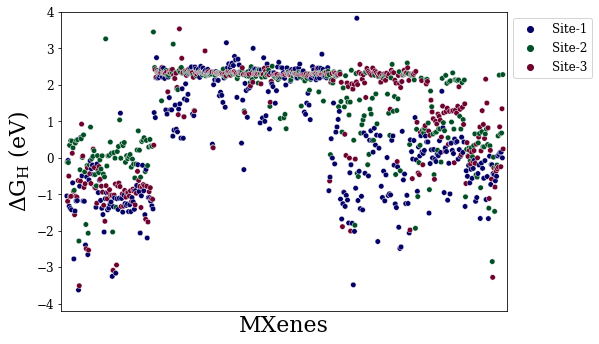

In [ ]:
fig, ax = plt.subplots(figsize=(8,5.5))
fig=sns.scatterplot(data=df2, x="Mxenes", y="gfe", hue='as2', palette=['#030066', '#014f25', '#6e012e'], legend=True, s=30 )
lims = [-4.2,4]
plt.xlim([-15,1135])
plt.ylim(lims)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
plt.ylabel(r'$\mathregular{\Delta{G}_{H}}$ (eV)', fontsize=22)
plt.xlabel("MXenes", fontsize=22)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
ax.axes.xaxis.set_ticks([])
plt.savefig("gfe mxenes 123 8*5.5.png", bbox_inches="tight", dpi=600, transparent=True)


In [ ]:
newcol = []
newcol2 = []
for row in df2['Mxenes']:
  newcol = re.findall('[a-zA-Z][^A-Z]*', row)
  newcol2.append(newcol[2])
df2['x-atom'] = newcol2
del newcol
del newcol2

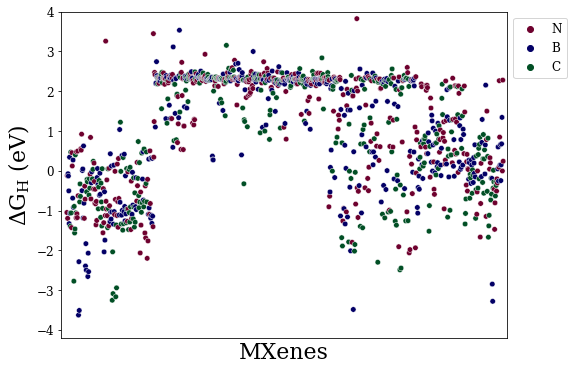

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
fig=sns.scatterplot(data=df2, x="Mxenes", y="gfe", hue='x-atom', palette=['#6e012e', '#030066', '#014f25' ], legend=True, s=30 )
lims = [-4.2,4]
plt.xlim([-15,1135])
plt.ylim(lims)

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12

plt.ylabel(r'$\mathregular{\Delta{G}_{H}}$ (eV)', fontsize=22)
plt.xlabel("MXenes", fontsize=22)
plt.legend(loc="upper left", bbox_to_anchor=(1,1))
ax.axes.xaxis.set_ticks([])
plt.savefig("gfe mxenes bcn 8*6.png", bbox_inches="tight", dpi=600, transparent=True)

In [ ]:
df5 = df2['Mxenes'].str.split(r'[A-Z]', expand=True)

In [ ]:
df2.to_csv('bcn_asc_done.csv', index=False)

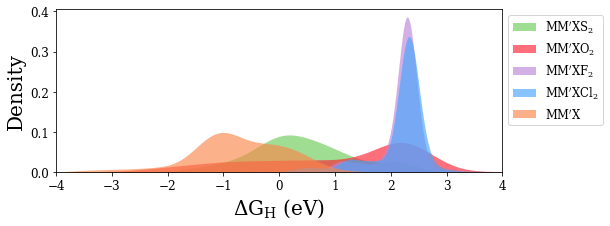

In [ ]:
fig, ax = plt.subplots(figsize=(8,3))
fig = sns.kdeplot(
   data=df2, x="gfe", hue="t",
   palette=['#fa874b', '#47a4fc', '#bb86d9', '#fc2335', '#6ccc58'],
  legend=False, fill=True, alpha=0.65, linewidth=0
)

lims = [-4,4]
plt.xlim(lims)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11.5
plt.xlabel(r'$\mathregular{\Delta{G}_{H}}$ (eV)', fontsize=20)
plt.ylabel("Density", fontsize=20)
plt.legend([ "MM${^{\prime}}$XS${\mathregular{_2}}$", "MM${^{\prime}}$XO${\mathregular{_2}}$", "MM${^{\prime}}$XF${\mathregular{_2}}$", "MM${^{\prime}}$XCl${\mathregular{_2}}$" ,"MM${^{\prime}}$X"], loc="upper left", bbox_to_anchor=(1,1))
plt.savefig("Density termination 8*3.png", bbox_inches="tight", dpi=600, transparent=True)

#gfe density plots


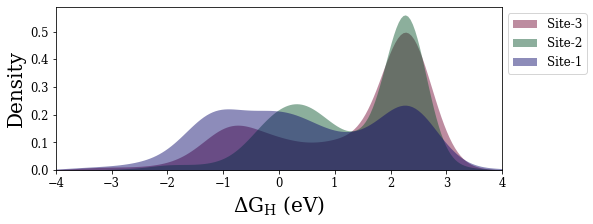

In [ ]:
fig, ax = plt.subplots(figsize=(8,3))
fig = sns.kdeplot(
   data=df2, x="gfe", hue="as2",
   fill=True, common_norm=False, palette=['#030066', '#014f25', '#6e012e'],
   alpha=0.45, linewidth=0, legend=False,
)

lims = [-4,4]
plt.xlim(lims)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
plt.xlabel(r'$\mathregular{\Delta{G}_{H}}$ (eV)', fontsize=20)
plt.ylabel("Density", fontsize=20)
plt.legend(['Site-3', 'Site-2', 'Site-1'],loc="upper left", bbox_to_anchor=(1,1))
plt.savefig("gfe kde termination 8*3.png", bbox_inches="tight", dpi=600, transparent=True)


In [ ]:
df = pd.read_csv('123_asc_done.csv')

In [ ]:
x_atom=[]
for row in df['Mxenes']:
  if 'B' in row:
    x_atom.append('B')
  elif 'CC' in row:
    x_atom.append('C')
  elif 'CF' in row:
    x_atom.append('C')
  elif 'CO' in row:
    x_atom.append('C')
  elif 'CS' in row:
    x_atom.append('C')
  elif 'CX' in row:
    x_atom.append('C')
  elif 'NC' in row:
    x_atom.append('N')
  elif 'NF' in row:
    x_atom.append('N')
  elif 'NO' in row:
    x_atom.append('N')
  elif 'NS' in row:
    x_atom.append('N')
  elif 'NX' in row:
    x_atom.append('N')
df['X'] = x_atom
del x_atom


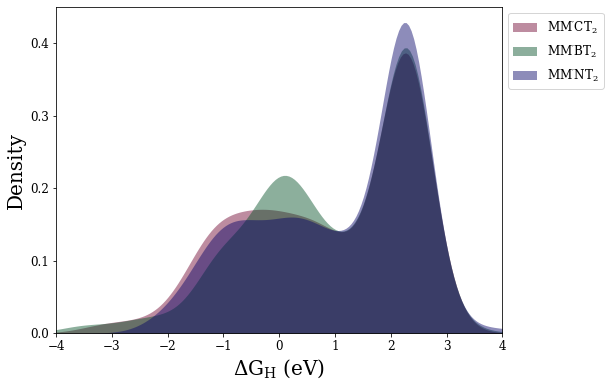

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
fig = sns.kdeplot(
   data=df, x="gfe", hue="X",
   fill=True, common_norm=False, palette=['#030066', '#014f25', '#6e012e'],
   alpha=0.45, linewidth=0, legend=True,
)

lims = [-4,4]
plt.xlim(lims)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 12
plt.xlabel(r'$\mathregular{\Delta{G}_{H}}$ (eV)', fontsize=20)
plt.ylabel("Density", fontsize=20)
plt.legend(['$\mathregular{MM^{\prime}CT_{2}}$', '$\mathregular{MM^{\prime}BT_{2}}$', '$\mathregular{MM^{\prime}NT_{2}}$'],loc="upper left", bbox_to_anchor=(1,1))
plt.savefig("gfe kde x-atom 8*6.png", bbox_inches="tight", dpi=600, transparent=True)

#feature importance plot

In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    model, train_x, train_y, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

feature_importances = pd.Series(result.importances_mean, index=train_x.columns)

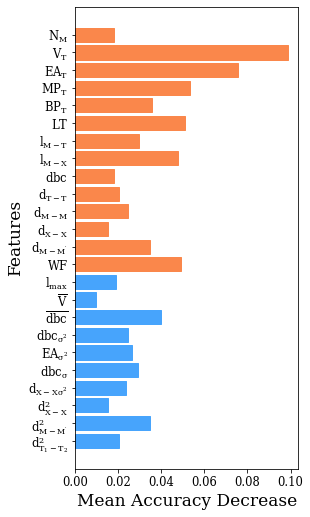

In [ ]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11.5
fig, ax = plt.subplots(figsize=(4,8.5))

features=['N$\mathregular{_{M}}$', 'V$\mathregular{_{T}}$', 'EA$\mathregular{_{T}}$', 'MP$\mathregular{_{T}}$', 'BP$\mathregular{_{T}}$', '$\mathregular{LT}$', 'l$\mathregular{_{M-T}}$', 'l$\mathregular{_{M-X}}$', '$\mathregular{dbc}$', 'd$\mathregular{_{T-T}}$', 'd$\mathregular{_{M-M}}$', 'd$\mathregular{_{X-X}}$', 'd$\mathregular{_{M-M{^\prime}}}$', '$\mathregular{WF}$', 'l$\mathregular{_{max}}$', '$\mathregular{\overline {V}}$', '$\mathregular{\overline {dbc}}$', 'dbc$\mathregular{_{\sigma^2}}$', '$\mathregular{EA_{\sigma^2}}$', 'dbc$\mathregular{_{\sigma}}$', '$\mathregular{{d_{X-X}}_{\sigma^2}}$', 'd$\mathregular{_{X-X}^2}$', 'd$\mathregular{_{M-M{^\prime}}^2}$', 'd$\mathregular{_{T_1-T_2}^2}$']
imp =  [0.017950, 0.098609, 0.075674, 0.053406, 0.035802, 0.051030, 0.029878, 0.047920, 0.018169, 0.020493, 0.024648, 0.015242, 0.034710, 0.049016, 0.018892, 0.009898, 0.039734, 0.024481, 0.026590, 0.029368, 0.023468, 0.015273, 0.034914, 0.020344]

graph = ax.barh(features, imp, align='center')
c = ['#fa874b', '#47a4fc', '#bb86d9'] 
for i in range(0,24):
  if i in range(0,5):
    graph[i].set_color(c[0])
  elif i in range(5,14):
    graph[i].set_color(c[0])
  else:
    graph[i].set_color(c[1])

ax.invert_yaxis()
ax.set_xlabel('Mean Accuracy Decrease', fontsize=17)
ax.set_ylabel('Features', fontsize=17)
plt.savefig('feature imp dark 4*8.5.png',dpi=800, bbox_inches = 'tight', transparent=True)
plt.show()


In [ ]:
df_pred = pd.read_csv('pred4500 rfr.csv') #includes RFR model predictions

In [ ]:
topmxenes = []
topgfe = []
i=0
for row in df_pred['pred gfe 4500']:
  if row < 0.1 and row > -0.1:
    topmxenes.append(df_pred.iloc[i,1])
    topgfe.append(row)
  i=i+1
newdf=pd.DataFrame()
newdf['Mxenes']=topmxenes
newdf['gfe'] = topgfe
del topmxenes
del topgfe

In [ ]:
newdf.to_csv('top predicted mxenes.csv', index=False)

#RFR Plots

In [ ]:
dfpred_1125 = pd.read_csv('predictions1125_rfr gfe.csv')

In [ ]:
activesite=[]
for row in dfpred_1125['Mxenes']:
  if str(row).endswith('-1'):
    activesite.append(1)
  elif str(row).endswith('-2'):
    activesite.append(2)
  elif str(row).endswith('-3'):
    activesite.append(3)  
dfpred_1125['Active site']=activesite
del activesite

In [ ]:
termination=[]
for row in dfpred_1125['Mxenes']:
  if 'S2' in row:
    termination.append('S')
  elif 'Cl2' in row:
    termination.append('Cl')
  elif 'F2' in row:
    termination.append('F')  
  elif 'O2' in row:
    termination.append('O')
  elif 'X' in row:
    termination.append('x')  
dfpred_1125['Termination']=termination
del termination

In [ ]:
x_atom=[]
for row in dfpred_1125['Mxenes']:
  if 'B' in row:
    x_atom.append('B')
  elif 'CC' in row:
    x_atom.append('C')
  elif 'CF' in row:
    x_atom.append('C')
  elif 'CO' in row:
    x_atom.append('C')
  elif 'CS' in row:
    x_atom.append('C')
  elif 'CX' in row:
    x_atom.append('C')
  elif 'NC' in row:
    x_atom.append('N')
  elif 'NF' in row:
    x_atom.append('N')
  elif 'NO' in row:
    x_atom.append('N')
  elif 'NS' in row:
    x_atom.append('N')
  elif 'NX' in row:
    x_atom.append('N')
dfpred_1125['X'] = x_atom
del x_atom



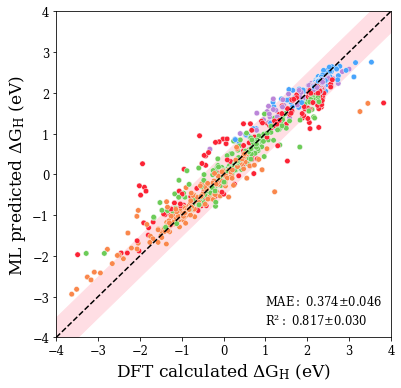

In [ ]:
fig = plt.figure( figsize = (6,6))
ax = fig.add_subplot()

ax.fill_between([-4,4], [-4.5,3.5], [-3.5,4.5], color = '#ffdee4')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11.5
plt.ylabel('ML predicted $\mathregular{\Delta G_H}$ (eV)', fontsize=17)
plt.xlabel('DFT calculated $\mathregular{\Delta G_H}$ (eV)', fontsize=17)
fig = sns.scatterplot(y=dfpred_1125['pred_gfe'], x=dfpred_1125['gfe'], hue=dfpred_1125['Termination'], palette=['#bb86d9', '#47a4fc', '#fc2335', '#6ccc58', '#fa874b'], s=30, edgecolor='#fafafa', legend=False)
plt.text(1, -3.2, str('$\mathregular{MAE:}$ ') + '0.374' + str('$\mathregular{\pm}$') + '0.046', horizontalalignment='left', size='medium', color='black')
plt.text(1, -3.7, str('$\mathregular{R^2:}$ ') + '0.817' + str('$\mathregular{\pm}$') + '0.030', horizontalalignment='left', size='medium', color='black')

lims = [-4,4]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims, '--', color = 'black')

patch1 = mpatches.Patch(color='#fa874b', label="MM${^{\prime}}$X")
patch2 = mpatches.Patch(color='#47a4fc', label="MM${^{\prime}}$XCl${\mathregular{_2}}$")
patch3 = mpatches.Patch(color='#bb86d9', label="MM${^{\prime}}$XF${\mathregular{_2}}$")
patch4 = mpatches.Patch(color='#fc2335', label="MM${^{\prime}}$XO${\mathregular{_2}}$")
patch5 = mpatches.Patch(color='#6ccc58', label="MM${^{\prime}}$XS${\mathregular{_2}}$")

plt.savefig('termination_rfr2.png', dpi=800, transparent=True)

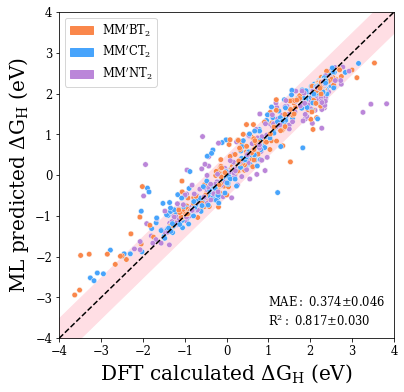

In [ ]:
fig = plt.figure( figsize = (6,6))
ax = fig.add_subplot()

ax.fill_between([-4,4], [-4.5,3.5], [-3.5,4.5], color = '#ffdee4')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11.5
plt.ylabel('ML predicted $\mathregular{\Delta G_H}$ (eV)', fontsize=20)
plt.xlabel('DFT calculated $\mathregular{\Delta G_H}$ (eV)', fontsize=20)
fig = sns.scatterplot(y=dfpred_1125['pred_gfe'], x=dfpred_1125['gfe'], hue=dfpred_1125['X'], palette=['#fa874b', '#47a4fc', '#bb86d9'], s=30, edgecolor='#fafafa', legend=True)
plt.text(1, -3.2, str('$\mathregular{MAE:}$ ') + '0.374' + str('$\mathregular{\pm}$') + '0.046', horizontalalignment='left', size='medium', color='black')
plt.text(1, -3.7, str('$\mathregular{R^2:}$ ') + '0.817' + str('$\mathregular{\pm}$') + '0.030', horizontalalignment='left', size='medium', color='black')

lims = [-4,4]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims, '--', color = 'black')

patch1 = mpatches.Patch(color='#fa874b', label="MM${^{\prime}}$BT${\mathregular{_2}}$")
patch2 = mpatches.Patch(color='#47a4fc', label="MM${^{\prime}}$CT${\mathregular{_2}}$")
patch3 = mpatches.Patch(color='#bb86d9', label="MM${^{\prime}}$NT${\mathregular{_2}}$")

plt.legend(handles=([patch1, patch2, patch3]))
plt.savefig('xbcn_rfr2.png', dpi=800, transparent=True)


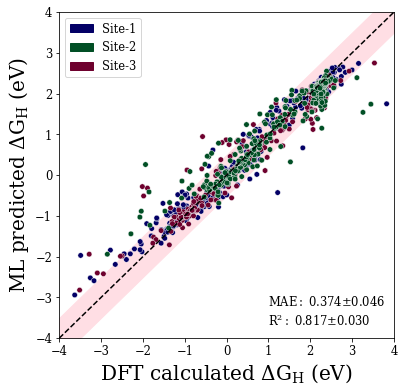

In [ ]:
fig = plt.figure( figsize = (6,6))
ax = fig.add_subplot()

ax.fill_between([-4,4], [-4.5,3.5], [-3.5,4.5], color = '#ffdee4')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11.5
plt.ylabel('ML predicted $\mathregular{\Delta G_H}$ (eV)', fontsize=20)
plt.xlabel('DFT calculated $\mathregular{\Delta G_H}$ (eV)', fontsize=20)
fig = sns.scatterplot(y=dfpred_1125['pred_gfe'], x=dfpred_1125['gfe'], hue=dfpred_1125['Active site'], palette=['#030066', '#014f25', '#6e012e'], s=30, edgecolor='#fafafa', legend=True)
plt.text(1, -3.2, str('$\mathregular{MAE:}$ ') + '0.374' + str('$\mathregular{\pm}$') + '0.046', horizontalalignment='left', size='medium', color='black')
plt.text(1, -3.7, str('$\mathregular{R^2:}$ ') + '0.817' + str('$\mathregular{\pm}$') + '0.030', horizontalalignment='left', size='medium', color='black')
lims = [-4,4]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims, '--', color = 'black')

patch1 = mpatches.Patch(color='#030066', label="Site-1")
patch2 = mpatches.Patch(color='#014f25', label="Site-2")
patch3 = mpatches.Patch(color='#6e012e', label="Site-3")

plt.legend(handles=([patch1, patch2, patch3]))
plt.savefig('site_rfr2.png', dpi=800, transparent=True)


#GBR plots

In [ ]:
model = joblib.load('gbr_model2.joblib')

In [ ]:
y_pred = model.predict(train_x)

In [ ]:
dfpred_1125 = pd.DataFrame()
dfpred_1125['gfe'] = train_y
dfpred_1125['gfe pred'] = y_pred

In [ ]:
df1 = pd.read_csv('features_4 (2).csv')
df2 = pd.read_csv('energy.csv')
dfmxenes = pd.merge(df1, df2, on = 'Mxenes')

In [ ]:
dfpred_1125['Mxenes'] = dfmxenes['Mxenes']

In [ ]:
activesite=[]
for row in dfpred_1125['Mxenes']:
  if str(row).endswith('-1'):
    activesite.append(1)
  elif str(row).endswith('-2'):
    activesite.append(2)
  elif str(row).endswith('-3'):
    activesite.append(3)  
dfpred_1125['Active site']=activesite
del activesite

In [ ]:
termination=[]
for row in dfpred_1125['Mxenes']:
  if 'S2' in row:
    termination.append('S')
  elif 'Cl2' in row:
    termination.append('Cl')
  elif 'F2' in row:
    termination.append('F')  
  elif 'O2' in row:
    termination.append('O')
  elif 'X' in row:
    termination.append('X')  
dfpred_1125['Termination']=termination
del termination

In [ ]:
x_atom=[]
for row in dfpred_1125['Mxenes']:
  if 'B' in row:
    x_atom.append('B')
  elif 'CC' in row:
    x_atom.append('C')
  elif 'CF' in row:
    x_atom.append('C')
  elif 'CO' in row:
    x_atom.append('C')
  elif 'CS' in row:
    x_atom.append('C')
  elif 'CX' in row:
    x_atom.append('C')
  elif 'NC' in row:
    x_atom.append('N')
  elif 'NF' in row:
    x_atom.append('N')
  elif 'NO' in row:
    x_atom.append('N')
  elif 'NS' in row:
    x_atom.append('N')
  elif 'NX' in row:
    x_atom.append('N')
dfpred_1125['X'] = x_atom
del x_atom



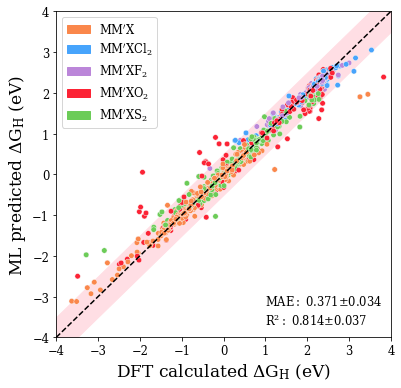

In [ ]:
fig = plt.figure( figsize = (6,6))
ax = fig.add_subplot()

ax.fill_between([-4,4], [-4.5,3.5], [-3.5,4.5], color = '#ffdee4')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11.5
plt.ylabel('ML predicted $\mathregular{\Delta G_H}$ (eV)', fontsize=17)
plt.xlabel('DFT calculated $\mathregular{\Delta G_H}$ (eV)', fontsize=17)
fig = sns.scatterplot(y=dfpred_1125['gfe pred'], x=dfpred_1125['gfe'], hue=dfpred_1125['Termination'], palette=['#bb86d9', '#47a4fc', '#fc2335', '#6ccc58', '#fa874b'], s=30, edgecolor='#fafafa', legend=False)
plt.text(1, -3.2, str('$\mathregular{MAE:}$ ') + '0.371' + str('$\mathregular{\pm}$') + '0.034', horizontalalignment='left', size='medium', color='black')
plt.text(1, -3.7, str('$\mathregular{R^2:}$ ') + '0.814' + str('$\mathregular{\pm}$') + '0.037', horizontalalignment='left', size='medium', color='black')

lims = [-4,4]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims, '--', color = 'black')

patch1 = mpatches.Patch(color='#fa874b', label="MM${^{\prime}}$X")
patch2 = mpatches.Patch(color='#47a4fc', label="MM${^{\prime}}$XCl${\mathregular{_2}}$")
patch3 = mpatches.Patch(color='#bb86d9', label="MM${^{\prime}}$XF${\mathregular{_2}}$")
patch4 = mpatches.Patch(color='#fc2335', label="MM${^{\prime}}$XO${\mathregular{_2}}$")
patch5 = mpatches.Patch(color='#6ccc58', label="MM${^{\prime}}$XS${\mathregular{_2}}$")

plt.legend(handles=([patch1, patch2, patch3, patch4, patch5]))
plt.savefig('termination_gbr2.png', dpi=800, transparent=True)

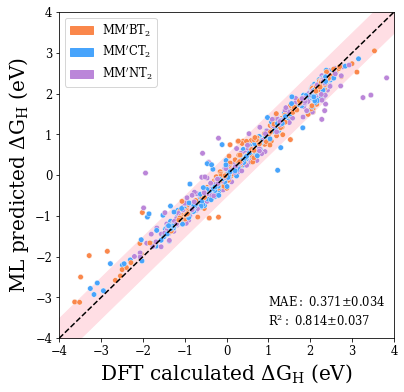

In [ ]:
fig = plt.figure( figsize = (6,6))
ax = fig.add_subplot()

ax.fill_between([-4,4], [-4.5,3.5], [-3.5,4.5], color = '#ffdee4')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11.5
plt.ylabel('ML predicted $\mathregular{\Delta G_H}$ (eV)', fontsize=20)
plt.xlabel('DFT calculated $\mathregular{\Delta G_H}$ (eV)', fontsize=20)
fig = sns.scatterplot(y=dfpred_1125['gfe pred'], x=dfpred_1125['gfe'], hue=dfpred_1125['X'], palette=['#fa874b', '#47a4fc', '#bb86d9'], s=30, edgecolor='#fafafa', legend=True)
plt.text(1, -3.2, str('$\mathregular{MAE:}$ ') + '0.371' + str('$\mathregular{\pm}$') + '0.034', horizontalalignment='left', size='medium', color='black')
plt.text(1, -3.7, str('$\mathregular{R^2:}$ ') + '0.814' + str('$\mathregular{\pm}$') + '0.037', horizontalalignment='left', size='medium', color='black')

lims = [-4,4]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims, '--', color = 'black')

patch1 = mpatches.Patch(color='#fa874b', label="MM${^{\prime}}$BT${\mathregular{_2}}$")
patch2 = mpatches.Patch(color='#47a4fc', label="MM${^{\prime}}$CT${\mathregular{_2}}$")
patch3 = mpatches.Patch(color='#bb86d9', label="MM${^{\prime}}$NT${\mathregular{_2}}$")

plt.legend(handles=([patch1, patch2, patch3]))
plt.savefig('xbcn_gbr2.png', dpi=800, transparent=True)


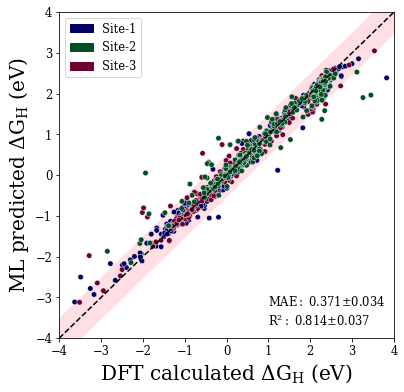

In [ ]:
fig = plt.figure( figsize = (6,6))
ax = fig.add_subplot()

ax.fill_between([-4,4], [-4.5,3.5], [-3.5,4.5], color = '#ffdee4')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.size'] = 11.5
plt.ylabel('ML predicted $\mathregular{\Delta G_H}$ (eV)', fontsize=20)
plt.xlabel('DFT calculated $\mathregular{\Delta G_H}$ (eV)', fontsize=20)
fig = sns.scatterplot(y=dfpred_1125['gfe pred'], x=dfpred_1125['gfe'], hue=dfpred_1125['Active site'], palette=['#030066', '#014f25', '#6e012e'], s=30, edgecolor='#fafafa', legend=True)
plt.text(1, -3.2, str('$\mathregular{MAE:}$ ') + '0.371' + str('$\mathregular{\pm}$') + '0.034', horizontalalignment='left', size='medium', color='black')
plt.text(1, -3.7, str('$\mathregular{R^2:}$ ') + '0.814' + str('$\mathregular{\pm}$') + '0.037', horizontalalignment='left', size='medium', color='black')

lims = [-4,4]
plt.xlim(lims)
plt.ylim(lims)
plt.plot(lims, lims, '--', color = 'black')

patch1 = mpatches.Patch(color='#030066', label="Site-1")
patch2 = mpatches.Patch(color='#014f25', label="Site-2")
patch3 = mpatches.Patch(color='#6e012e', label="Site-3")


plt.legend(handles=([patch1, patch2, patch3]))
plt.savefig('site_gbr2.png', dpi=800, transparent=True)
